In [12]:
import pennylane as qml
import scipy as sp
from pennylane import numpy as np
from pennylane import math as m

# import numpy as np
# import autograd.numpy as np

import matplotlib.pyplot as plt


# Variable for plot
N = 1000
tau_CFI = np.linspace(-0.001, 3.0, N)


# == Generate coeff ==
def With_norm(theta, gamma):
	coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) ) 
	
	# norm = np.linalg.norm(coeff)
	norm = np.sqrt( np.sum( np.abs(coeff)**2))
	# norm_sp = sp.linalg.norm(coeff)
	# norm_new = qml.math.sqrt(qml.math.real(coeff[0])**2 + qml.math.imag(coeff[0])**2 + qml.math.real(coeff[1])**2 + qml.math.imag(coeff[1])**2)
	
	# print(norm_new == norm)
	# return norm
	return coeff / norm


def Without_norm(theta):
    gamma = 0
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    
    norm_new = qml.math.sqrt(qml.math.real(coeff[0])**2 + qml.math.imag(coeff[0])**2 + qml.math.real(coeff[1])**2 + qml.math.imag(coeff[1])**2)
    # norm = np.linalg.norm(coeff)
    norm = 1
    
    return coeff / norm


# With_norm(np.pi,0)

In [13]:
print(With_norm(2,0))
print(Without_norm(2))

[0.29192658-0.45464871j 0.70807342+0.45464871j]
[0.29192658-0.45464871j 0.70807342+0.45464871j]


In [14]:
# precision
def round_oper(coeff_in, n):
    coeff_round = np.zeros(2, dtype='complex_')
    
    for i in range(2):
        coeff_round[i] = round(coeff_in[i].numpy().real, n) + round(coeff_in[i].numpy().imag, n) * 1j
    
    return coeff_round

In [15]:
# # #  == norm test ==
# print('norm:',With_norm(0.1,0))


# norm_array = np.zeros(len(tau_CFI))
# for i in range(len(tau_CFI)):
#     norm_array[i] = With_norm(i,0)

# fig, ax = plt.subplots()
# ax.plot(tau_CFI, norm_array)
# plt.title('norm')
# plt.xlabel('Time')
# plt.ylabel('value')
# # plt.legend()
# plt.grid()

In [16]:
# == Sweep for all theta if coeff generated by two func are diff ==

Num_of_samples = len(tau_CFI)
t_var = (np.linspace(-2*np.pi, 2*np.pi, Num_of_samples))

coeff_diff = np.zeros(Num_of_samples)
save_with_norm = [[0 for col in range(2)] for row in range(Num_of_samples)]
save_without_norm = [[0 for col in range(2)] for row in range(Num_of_samples)]

count = 0

# Sweep for all theta
for i in range(len(t_var)):
    coeff_diff[i] = ((With_norm(i,0)[0] == Without_norm(i)[0]) and (With_norm(i,0)[1] == Without_norm(i)[1]) )
    
    # if, different
    if coeff_diff[i] == False:
        save_with_norm[count][0] = With_norm(i,0)[0]
        save_with_norm[count][1] = With_norm(i,0)[1]
        save_without_norm[count][0] = Without_norm(i)[0]
        save_without_norm[count][1] = Without_norm(i)[1]
        count = count+1
count = 0  


# Test for all coeff is same under gamma = 0 and theta = ~
# print(coeff_diff,'\n')

print(' == Generate coeff ==')
print('With_normalized[0_state / 1_state]')
print('Without[0_state / 1_state]')
while(save_with_norm[count][0] != 0):
    print('Index:',count)
    print(save_with_norm[count][0],' ',save_with_norm[count][1])
    print(save_without_norm[count][0],' ',save_without_norm[count][1])
    
    count = count +1
count = 0    


type(save_with_norm)

 == Generate coeff ==
With_normalized[0_state / 1_state]
Without[0_state / 1_state]
Index: 0
(0.005003751699777293-0.07056000402993362j)   (0.9949962483002229+0.07056000402993362j)
(0.005003751699777292-0.0705600040299336j)   (0.9949962483002227+0.0705600040299336j)
Index: 1
(0.9800851433251832+0.13970774909946296j)   (0.01991485667481702-0.13970774909946296j)
(0.9800851433251829+0.13970774909946293j)   (0.019914856674817016-0.13970774909946293j)
Index: 2
(0.0804642354617738+0.27201055544468494j)   (0.9195357645382265-0.27201055544468494j)
(0.08046423546177378+0.2720105554446849j)   (0.9195357645382263-0.2720105554446849j)
Index: 3
(0.9537233907250984-0.2100835184133205j)   (0.04627660927490191+0.2100835184133205j)
(0.9537233907250982-0.21008351841332046j)   (0.0462766092749019+0.21008351841332046j)
Index: 4
(0.36241833097420156+0.4806987459397785j)   (0.6375816690257986-0.4806987459397785j)
(0.3624183309742015+0.4806987459397784j)   (0.6375816690257985-0.4806987459397784j)
Index: 5
(0

list

In [17]:
# == Generate Q_node ==

dev_with_norm = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_with_norm)
def circuit_with_norm(theta):
    
    qml.QubitStateVector(With_norm(theta, 0), wires=range(1))

    
    return qml.probs()
    # return qml.density_matrix(wires=0)
    
    
dev_without = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_without)
def circuit_without(theta):
    
    qml.QubitStateVector(Without_norm(theta), wires=range(1))

    
    return qml.probs()
    # return qml.density_matrix(wires=0)
    
# circuit_without(np.pi/2)

In [18]:
# circuit_diff = np.zeros(N)
# save_cir_with_norm = np.zeros(N)
# save_cir_without = np.zeros(N)

# print('circuit') 
# for i in range(len(tau_CFI)):
#     print(circuit_without(i))

In [19]:
# == Test Qnode output from two different coefficient of state vector == 

circuit_diff = np.zeros(N)
save_cir_with_norm = np.zeros(N)
save_cir_without = np.zeros(N)

count = 0 
for i in range(len(tau_CFI)):
    circuit_diff[i] = (circuit_without(i)[0] == circuit_with_norm(i)[0]) and (circuit_without(i)[1] == circuit_with_norm(i)[1])
    
    if circuit_diff[i] == False:
        save_cir_with_norm[count] = circuit_with_norm(i)[0]
        save_cir_without[count] = circuit_without(i)[0]
        count = count+1
        
count = 0

# Test for all coeff is same under gamma = 0 and theta = ~
# print(circuit_diff,'\n')

print('== After Qnode ==')
print('normalized circuit out / with_out normalized circuit out')
while(save_cir_with_norm[count] != False):
    print(save_cir_with_norm[count],' ',save_cir_without[count])
    count = count +1
count = 0    

== After Qnode ==
normalized circuit out / with_out normalized circuit out
0.005003751699777273   0.005003751699777272
0.9800851433251834   0.9800851433251829
0.0804642354617738   0.08046423546177377
0.9537233907250987   0.9537233907250982
0.3624183309742016   0.3624183309742015
0.2261353698878659   0.22613536988786576
0.7120895036684987   0.7120895036684984
0.8234596611643206   0.82345966116432
0.35393059563308205   0.35393059563308193
0.9171116802532554   0.917111680253255
0.977536822023648   0.9775368220236476
0.17992783026540024   0.17992783026540016
0.9929482907912751   0.9929482907912747
0.016374705863058763   0.016374705863058756
0.13190364088634207   0.13190364088634202
0.052014526604518455   0.05201452660451843
0.0028162695358992383   0.002816269535899237
0.6587143507598511   0.6587143507598509
0.1088845550564421   0.10888455505644205
0.9913897910206108   0.9913897910206103
0.6877547988835062   0.687754798883506
0.0004895933426759975   0.0004895933426759974
0.8097603062796054 

In [20]:
# # Plot after norm circuit prob of [0]

# meas_prob = np.zeros(N)

# for i in range(len(tau_CFI)):
#     # 1/2 [1 - cos(w_0*t)]
#     # meas_prob[i] = 1 - abs(circuit(t_variable[i]).numpy()[0])
#     meas_prob[i] = circuit_with_norm(i)[0]
 
# fig, ax = plt.subplots()
# ax.plot(tau_CFI, meas_prob, label = 'w = 1?')
# plt.title('Circuit_prob_with_norm')
# plt.xlabel('Time')
# plt.ylabel('Probability')
# plt.legend()
# plt.grid()

Type: <class 'pennylane.numpy.tensor.tensor'>
== print out CFI ==


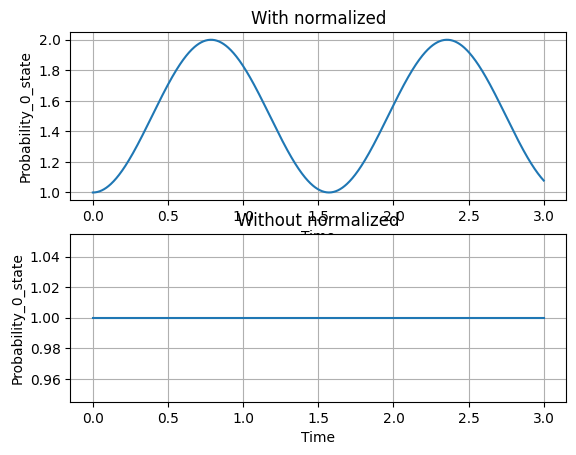

In [23]:
# == Compare with CFI plot ==
N = 1000
tau_CFI = np.linspace(-0.001, 3.0, N)

print('Type:', type(tau_CFI))
CFI_without = np.zeros(N)
CFI_with = np.zeros(N)

for i in range(len(tau_CFI)):
    CFI_with[i] = qml.qinfo.classical_fisher(circuit_with_norm)(tau_CFI[i])
    CFI_without[i] = qml.qinfo.classical_fisher(circuit_without)(tau_CFI[i])

plt.subplot(211)
plt.plot(tau_CFI, CFI_with)
plt.title('With normalized')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
# plt.legend()
plt.grid()


print('== print out CFI ==')
plt.subplot(212)
plt.plot(tau_CFI, CFI_without)
plt.title('Without normalized')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
plt.grid()

== print out CFI ==


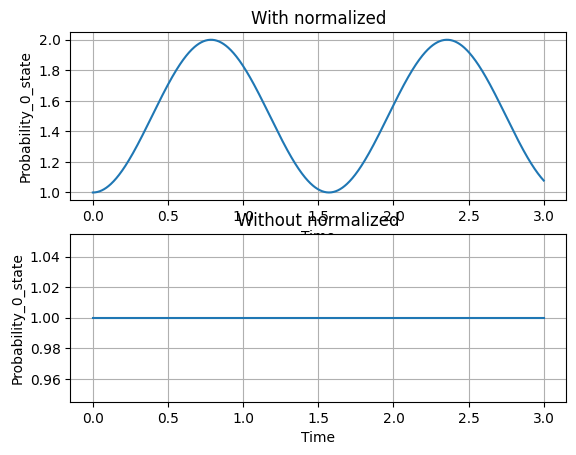

In [22]:
import pennylane as qml
import scipy as sp
from pennylane import numpy as np
from pennylane import math as m

# import numpy as np
# import autograd.numpy as np

import matplotlib.pyplot as plt


# Variable for plot
N = 1000
tau_CFI = np.linspace(-0.001, 3.0, N)


# == Generate coeff ==
def With_norm(theta, gamma):
	coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) ) 
	
	norm = np.linalg.norm(coeff)
	# norm_sp = sp.linalg.norm(coeff)
	# norm_new = qml.math.sqrt(qml.math.real(coeff[0])**2 + qml.math.imag(coeff[0])**2 + qml.math.real(coeff[1])**2 + qml.math.imag(coeff[1])**2)
	
	# print(norm_new == norm)
	# return norm
	return coeff / norm


def Without_norm(theta):
    gamma = 0
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    
    norm_new = qml.math.sqrt(qml.math.real(coeff[0])**2 + qml.math.imag(coeff[0])**2 + qml.math.real(coeff[1])**2 + qml.math.imag(coeff[1])**2)
    # norm = np.linalg.norm(coeff)
    norm = 1
    
    return coeff / norm


# With_norm(np.pi,0)

# == Generate Q_node ==

dev_with_norm = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_with_norm)
def circuit_with_norm(theta):
    
    qml.QubitStateVector(With_norm(theta, 0), wires=range(1))

    
    return qml.probs()
    # return qml.density_matrix(wires=0)
    
    
dev_without = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_without)
def circuit_without(theta):
    
    qml.QubitStateVector(Without_norm(theta), wires=range(1))

    
    return qml.probs()
    # return qml.density_matrix(wires=0)
    
# circuit_without(np.pi/2)

# == Compare with CFI plot ==
N = 1000
tau_CFI = np.linspace(-0.001, 3.0, N)

CFI_without = np.zeros(N)
CFI_with = np.zeros(N)

for i in range(len(tau_CFI)):
    CFI_with[i] = qml.qinfo.classical_fisher(circuit_with_norm)(tau_CFI[i])
    CFI_without[i] = qml.qinfo.classical_fisher(circuit_without)(tau_CFI[i])

plt.subplot(211)
plt.plot(tau_CFI, CFI_with)
plt.title('With normalized')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
# plt.legend()
plt.grid()


print('== print out CFI ==')
plt.subplot(212)
plt.plot(tau_CFI, CFI_without)
plt.title('Without normalized')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
plt.grid()